 <p style="padding:10px;background-color:BLACK;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 15px;overflow:hidden;font-weight:500">ABOUT THE DATASET<a id='1'></a></p>
<p style="text-align:justify; ">
The Pizza Challenge
For the Maven Pizza Challenge, you’ll be playing the role of a BI Consultant hired by Plato's Pizza, a Greek-inspired pizza place in New Jersey. You've been hired to help the restaurant use data to improve operations, and just received the following note:

Welcome aboard, we're glad you're here to help!

Things are going OK here at Plato's, but there's room for improvement. We've been collecting transactional data for the past year, but really haven't been able to put it to good use. Hoping you can analyze the data and put together a report to help us find opportunities to drive more sales and work more efficiently.

Here are some questions that we'd like to be able to answer:

1. What days and times do we tend to be busiest?
2. How many pizzas are we making during peak periods?
3. What are our best and worst-selling pizzas?
4. What's our average order value?
5. How well are we utilizing our seating capacity? (we have 15 tables and 60 seats)
That's all I can think of for now, but if you have any other ideas I'd love to hear them – you're the expert!

Thanks in advance,

Mario Maven (Manager, Plato's Pizza)
</p>

<br>
Source : https://www.kaggle.com/datasets/shilongzhuang/pizza-sales

# <u>Pizza Restaurant Sales Analysis</u>
![](https://upload.wikimedia.org/wikipedia/commons/9/91/Pizza-3007395.jpg)

 <p style="padding:10px;background-color:BLACK;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 15px;overflow:hidden;font-weight:500">TABLE OF CONTENTS</p>

- [Data Description](#1)

- [Import Data & Library](#2)

- [Data Understanding](#3)

- [Data Preparation](#4)

- [Exploratory Data Analysis](#5)

- [EDA Summary](#6)
 
    


 <p style="padding:10px;background-color:BLACK;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 15px;overflow:hidden;font-weight:500">IMPORT DATA & LIBRARY<a id='2'></a></p> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.style.use('ggplot')
pd.set_option('display.max_columns',50)

In [2]:
df = pd.read_csv('pizza.csv')

 <p style="padding:10px;background-color:BLACK;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 15px;overflow:hidden;font-weight:500">DATA UNDERSTANDING<a id='3'></a></p> 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [4]:
df['order_date_time'] = pd.to_datetime(df['order_date']+' '+df['order_time'], format='%d/%m/%Y %I:%M:%S %p')

In [5]:
df['order_date_time'].describe()

count                            48620
mean     2015-06-30 03:28:34.933833984
min                2015-01-01 11:38:36
25%                2015-03-31 15:34:31
50%                2015-06-28 19:50:30
75%                2015-09-28 18:39:55
max                2015-12-31 23:02:05
Name: order_date_time, dtype: object

In [6]:
df['order_dayname'] = df['order_date_time'].dt.day_name()
df['order_day'] = df['order_date_time'].dt.day
df['order_month'] = df['order_date_time'].dt.month_name()
df['order_year'] = df['order_date_time'].dt.year
df['order_hour'] = df['order_date_time'].dt.hour
df['order_minute'] = df['order_date_time'].dt.minute


In [7]:
df.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name', 'order_date_time',
       'order_dayname', 'order_day', 'order_month', 'order_year', 'order_hour',
       'order_minute'],
      dtype='object')

In [8]:
df['pizza_name'].value_counts()

pizza_name
The Classic Deluxe Pizza                      2416
The Barbecue Chicken Pizza                    2372
The Hawaiian Pizza                            2370
The Pepperoni Pizza                           2369
The Thai Chicken Pizza                        2315
The California Chicken Pizza                  2302
The Spicy Italian Pizza                       1887
The Sicilian Pizza                            1887
The Southwest Chicken Pizza                   1885
The Four Cheese Pizza                         1850
The Italian Supreme Pizza                     1849
The Big Meat Pizza                            1811
The Vegetables + Vegetables Pizza             1510
The Mexicana Pizza                            1456
The Napolitana Pizza                          1451
The Spinach and Feta Pizza                    1432
The Prosciutto and Arugula Pizza              1428
The Pepper Salami Pizza                       1422
The Italian Capocollo Pizza                   1414
The Greek Pizza     

In [9]:
df['unit_price'].describe()

count    48620.000000
mean        16.494132
std          3.621789
min          9.750000
25%         12.750000
50%         16.500000
75%         20.250000
max         35.950001
Name: unit_price, dtype: float64

In [10]:
df['pizza_size'].unique()

array(['Large', 'Medium', 'Regular', 'X-Large', 'XX-Large'], dtype=object)

In [11]:
df['pizza_size'].value_counts()

pizza_size
Large       18526
Medium      15385
Regular     14137
X-Large       544
XX-Large       28
Name: count, dtype: int64

In [12]:
df.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name', 'order_date_time',
       'order_dayname', 'order_day', 'order_month', 'order_year', 'order_hour',
       'order_minute'],
      dtype='object')

In [13]:
df['pizza_ingredients'].nunique()

32

In [14]:
df['pizza_name'].nunique()

32

In [15]:
df[
    ['pizza_name','pizza_ingredients']
].groupby('pizza_name').describe()

pizza_ingredients         \
                                                       count unique   
pizza_name                                                            
The Barbecue Chicken Pizza                              2372      1   
The Big Meat Pizza                                      1811      1   
The Brie Carre Pizza                                     480      1   
The Calabrese Pizza                                      927      1   
The California Chicken Pizza                            2302      1   
The Chicken Alfredo Pizza                                980      1   
The Chicken Pesto Pizza                                  961      1   
The Classic Deluxe Pizza                                2416      1   
The Five Cheese Pizza                                   1359      1   
The Four Cheese Pizza                                   1850      1   
The Greek Pizza                                         1406      1   
The Green Garden Pizza                                   987      1   
The Hawaiian Pizza                                      2370      1   
The Italian Capocollo Pizza                             1414      1   
The Italian Supreme Pizza                               1849      1   
The Italian Vegetables Pizza                             975      1   
The Mediterranean Pizza                                  923      1   
The Mexicana Pizza                                      1456      1   
The Napolitana Pizza                                    1451      1   
The Pepper Salami Pizza                                 1422      1   
The Pepperoni Pizza                                     2369      1   
The Pepperoni, Mushroom, and Peppers Pizza              1342      1   
The Prosciutto and Arugula Pizza                        1428      1   
The Sicilian Pizza                                      1887      1   
The Soppressata Pizza                                    957      1   
The Southwest Chicken Pizza                             1885      1   
The Spicy Italian Pizza                                 1887      1   
The Spinach Pesto Pizza                                  957      1   
The Spinach Supreme Pizza                                940      1   
The Spinach and Feta Pizza                              1432      1   
The Thai Chicken Pizza                                  2315      1   
The Vegetables + Vegetables Pizza                       1510      1   

                                                                                               \
                                                                                          top   
pizza_name                                                                                      
The Barbecue Chicken Pizza                  Barbecued Chicken, Red Peppers, Green Peppers,...   
The Big Meat Pizza                          Bacon, Pepperoni, Italian Sausage, Chorizo Sau...   
The Brie Carre Pizza                        Brie Carre Cheese, Prosciutto, Caramelized Oni...   
The Calabrese Pizza                         ?duja Salami, Pancetta, Tomatoes, Red Onions, ...   
The California Chicken Pizza                Chicken, Artichoke, Spinach, Garlic, Jalapeno ...   
The Chicken Alfredo Pizza                   Chicken, Red Onions, Red Peppers, Mushrooms, A...   
The Chicken Pesto Pizza                     Chicken, Tomatoes, Red Peppers, Spinach, Garli...   
The Classic Deluxe Pizza                    Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
The Five Cheese Pizza                       Mozzarella Cheese, Provolone Cheese, Smoked Go...   
The Four Cheese Pizza                       Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...   
The Greek Pizza                             Kalamata Olives, Feta Cheese, Tomatoes, Garlic...   
The Green Garden Pizza                      Spinach, Mushrooms, Tomatoes, Green Olives, Fe...   
The Hawaiian Pizza                                   Sliced Ham, Pineapple, Mozzarella Cheese   
The I

In [16]:
df['pizza_ingredients'] = df['pizza_ingredients'].str.replace(r'^\?', 'N', regex=True)

In [17]:
df['pizza_ingredients'].unique()

array(['Chicken, Pineapple, Tomatoes, Red Peppers, Thai Sweet Chilli Sauce',
       'Chicken, Tomatoes, Red Peppers, Red Onions, Jalapeno Peppers, Corn, Cilantro, Chipotle Sauce',
       'Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce',
       'Chicken, Artichoke, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda Cheese',
       'Chicken, Tomatoes, Red Peppers, Spinach, Garlic, Pesto Sauce',
       'Chicken, Red Onions, Red Peppers, Mushrooms, Asiago Cheese, Alfredo Sauce',
       'Spinach, Artichokes, Tomatoes, Sun-dried Tomatoes, Garlic, Pesto Sauce',
       'Spinach, Red Onions, Pepperoni, Tomatoes, Artichokes, Kalamata Olives, Garlic, Asiago Cheese',
       'Soppressata Salami, Fontina Cheese, Mozzarella Cheese, Mushrooms, Garlic',
       'Prosciutto di San Daniele, Arugula, Mozzarella Cheese',
       'Genoa Salami, Capocollo, Pepperoni, Tomatoes, Asiago Cheese, Garlic',
       'Calabrese Salami, Capocollo, Tomatoes, Red Onions, Green Oli

In [18]:
df = df.sort_values(by='order_date_time').reset_index(drop=True)
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,order_date_time,order_dayname,order_day,order_month,order_year,order_hour,order_minute
0,1,1,hawaiian_m,1,1/1/2015,11:38:36 AM,13.25,13.25,Medium,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,2015-01-01 11:38:36,Thursday,1,January,2015,11,38
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40 AM,16.00,16.00,Medium,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,2015-01-01 11:57:40,Thursday,1,January,2015,11,57
2,4,2,ital_supr_l,1,1/1/2015,11:57:40 AM,20.75,20.75,Large,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,2015-01-01 11:57:40,Thursday,1,January,2015,11,57
3,3,2,five_cheese_l,1,1/1/2015,11:57:40 AM,18.50,18.50,Large,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,2015-01-01 11:57:40,Thursday,1,January,2015,11,57
4,5,2,mexicana_m,1,1/1/2015,11:57:40 AM,16.00,16.00,Medium,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,2015-01-01 11:57:40,Thursday,1,January,2015,11,57


- 📌 Data is clean. No major cleaning required

-----

 <p style="padding:10px;background-color:BLACK;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 15px;overflow:hidden;font-weight:500">DATA PREPARATION FOR EDA<a id='4'></a></p> 

In [19]:
df[['pizza_name','unit_price']].groupby('pizza_name').max().sort_values(by='unit_price',ascending=False)

,unit_price
pizza_name,
The Greek Pizza,35.950001
The Brie Carre Pizza,23.650000
The Italian Vegetables Pizza,21.000000
The Prosciutto and Arugula Pizza,20.750000
The Pepper Salami Pizza,20.750000
The Soppressata Pizza,20.750000
The Southwest Chicken Pizza,20.750000
The Italian Supreme Pizza,20.750000
The Spicy Italian Pizza,20.750000


In [20]:
df.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name', 'order_date_time',
       'order_dayname', 'order_day', 'order_month', 'order_year', 'order_hour',
       'order_minute'],
      dtype='object')

In [21]:
df = df[[
    #'pizza_id', 'order_id', 
    'pizza_name_id', 
    'order_date_time','pizza_name','quantity', 'pizza_size', 'pizza_category', 
    'unit_price', 'total_price','order_dayname', 'order_day', 'order_month', 'order_year',
       'order_hour','order_minute',
    #'order_date',
       #'order_time', 
    'pizza_ingredients'
]].copy()

In [22]:
df.head()

,pizza_name_id,order_date_time,pizza_name,quantity,pizza_size,pizza_category,unit_price,total_price,order_dayname,order_day,order_month,order_year,order_hour,order_minute,pizza_ingredients
0,hawaiian_m,2015-01-01 11:38:36,The Hawaiian Pizza,1,Medium,Classic,13.25,13.25,Thursday,1,January,2015,11,38,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,classic_dlx_m,2015-01-01 11:57:40,The Classic Deluxe Pizza,1,Medium,Classic,16.00,16.00,Thursday,1,January,2015,11,57,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,ital_supr_l,2015-01-01 11:57:40,The Italian Supreme Pizza,1,Large,Supreme,20.75,20.75,Thursday,1,January,2015,11,57,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
3,five_cheese_l,2015-01-01 11:57:40,The Five Cheese Pizza,1,Large,Veggie,18.50,18.50,Thursday,1,January,2015,11,57,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
4,mexicana_m,2015-01-01 11:57:40,The Mexicana Pizza,1,Medium,Veggie,16.00,16.00,Thursday,1,January,2015,11,57,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


- 📌 Data is prepared. Removed unwanted columns

 <p style="padding:10px;background-color:BLACK;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 15px;overflow:hidden;font-weight:500">EXPLORATORY DATA ANALYSIS<a id='5'></a></p> 

In [23]:
df['pizza_name_id'].nunique()

91

In [24]:
# Top 5 Pizza ID
df['pizza_name_id'].value_counts().head(5)

pizza_name_id
big_meat_s       1811
thai_ckn_l       1365
five_cheese_l    1359
four_cheese_l    1273
classic_dlx_m    1159
Name: count, dtype: int64

In [25]:
# Bottom 5 Pizza ID
df['pizza_name_id'].value_counts().tail(5)

pizza_name_id
mexicana_s        160
calabrese_s        99
ckn_alfredo_s      96
green_garden_l     94
the_greek_xxl      28
Name: count, dtype: int64

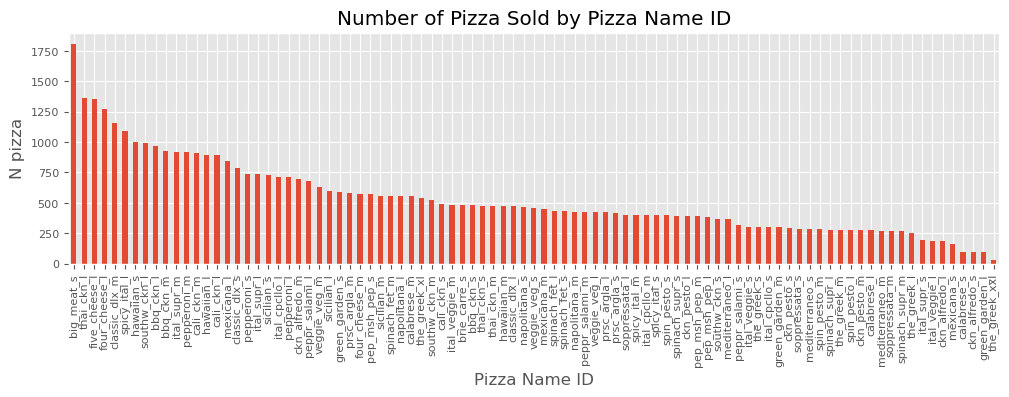

In [26]:
# Number of pizzas being sold
df['pizza_name_id'].value_counts().plot(kind='bar',
                                    xlabel='Pizza Name ID',
                                    ylabel='N pizza',
                                    title='Number of Pizza Sold by Pizza Name ID',
                                    fontsize=(8),
                                    figsize=(12,3))
plt.show()

In [27]:
# Top 5 Highest Profit Pizza ID
df_profit_pizza = df.groupby('pizza_name_id')['total_price']    \
                    .sum().reset_index().sort_values(by='total_price', ascending=False)   \
                    .reset_index(drop=True)
df_profit_pizza.head(5)

,pizza_name_id,total_price
0,thai_ckn_l,29257.500000
1,five_cheese_l,26066.500000
2,four_cheese_l,23622.201001
3,spicy_ital_l,23011.750000
4,big_meat_s,22968.000000


In [28]:
# Bottom 5 Lowest Profit Pizza ID
df_profit_pizza.tail(5)

,pizza_name_id,total_price
86,mexicana_s,1944.000000
87,green_garden_l,1923.750000
88,ckn_alfredo_s,1224.000000
89,calabrese_s,1212.750000
90,the_greek_xxl,1006.600021


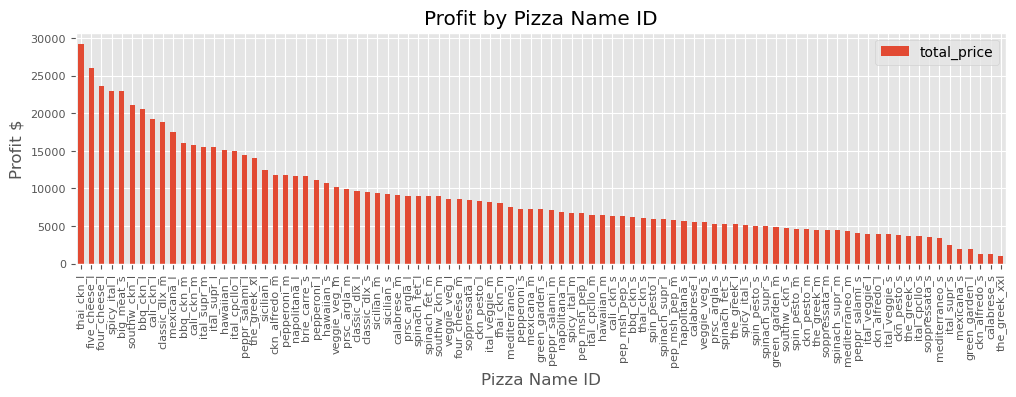

In [29]:
# Profit by pizza_name
df_profit_pizza.plot(kind='bar',x='pizza_name_id',
                    xlabel='Pizza Name ID',
                    ylabel='Profit $',
                    title='Profit by Pizza Name ID',
                    fontsize=(8),
                    figsize=(12,3))
plt.show()

In [30]:
df['pizza_size'].value_counts()

pizza_size
Large       18526
Medium      15385
Regular     14137
X-Large       544
XX-Large       28
Name: count, dtype: int64

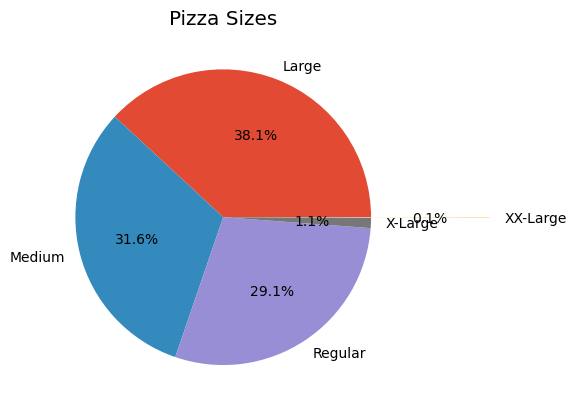

In [31]:
df['pizza_size'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',explode=(0,0,0,0,0.8),title='Pizza Sizes')
plt.axis('off')
plt.show()

In [32]:
df['pizza_category'].value_counts()

pizza_category
Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: count, dtype: int64

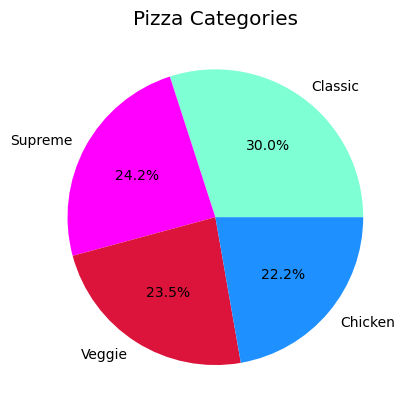

In [33]:
colors= ['aquamarine','magenta','crimson','dodgerblue']
df['pizza_category'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',colors=colors,title='Pizza Categories')
plt.axis('off')
plt.show()

In [34]:
avg_byday = df.groupby(['order_month','order_dayname'])['total_price'].agg(['sum','count']).reset_index()
avg_byday['avg_order_value'] = avg_byday['sum']/avg_byday['count']
avg_byday.head()

,order_month,order_dayname,sum,count,avg_order_value
0,April,Friday,10618.000013,628,16.907643
1,April,Monday,9758.800003,577,16.912998
2,April,Saturday,9686.700006,572,16.934790
3,April,Sunday,7199.500010,434,16.588710
4,April,Thursday,11706.050016,690,16.965290


In [35]:
ordered_cats = {
    'order_dayname':['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
    'pizza_size':['Regular','Medium','Large','X-Large','XX-Large'],
    'order_month':['January','February','March','April','May','June','July','August','September','October','November','December']
}

In [36]:
category = pd.CategoricalDtype(ordered_cats['order_dayname'], ordered=True)
avg_byday['order_dayname'] = avg_byday['order_dayname'].astype(category)

C:\Users\User\AppData\Local\Temp\ipykernel_1596\1591296676.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
C:\Users\User\AppData\Local\Temp\ipykernel_1596\1591296676.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)


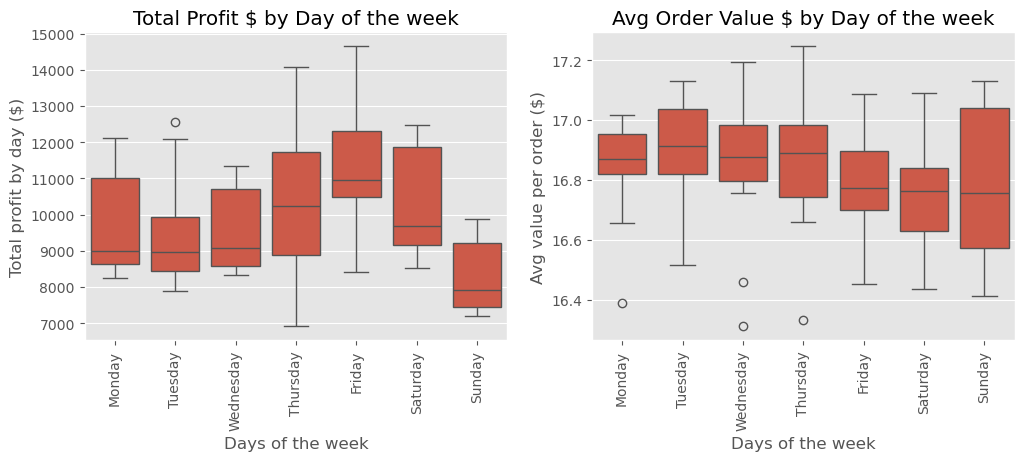

In [37]:
# Plotting total profit and avg_order_value by Day of the Week
fig, axes = plt.subplots(1,2, figsize=(12,4))

ax1 = sns.boxplot(data=avg_byday,
                  x='order_dayname',
                  y='sum',
                 ax=axes[0])
ax1.set(ylabel='Total profit by day ($)',
      xlabel='Days of the week',title='Total Profit $ by Day of the week')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

ax2 = sns.boxplot(data=avg_byday,
                  x='order_dayname',
                  y='avg_order_value',
                 ax=axes[1])
ax2.set(ylabel='Avg value per order ($)',
      xlabel='Days of the week',title='Avg Order Value $ by Day of the week')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

plt.show()

In [38]:
df_order_quantity = df[['quantity','order_dayname']].groupby('order_dayname')['quantity'].agg(['count','sum']).reset_index()

In [39]:
category = pd.CategoricalDtype(ordered_cats['order_dayname'], ordered=True)
df_order_quantity['order_dayname'] = df_order_quantity['order_dayname'].astype(category)
df_order_quantity = df_order_quantity.sort_values('order_dayname').reset_index(drop=True)
df_order_quantity.rename(columns={'order_dayname': 'day','count':'order','sum':'quantity'}, inplace=True)

In [40]:
df_order_quantity['quantity/order ratio'] = df_order_quantity['quantity']/df_order_quantity['order']
df_order_quantity

,day,order,quantity,quantity/order ratio
0,Monday,6369,6485,1.018213
1,Tuesday,6753,6895,1.021028
2,Wednesday,6797,6946,1.021921
3,Thursday,7323,7478,1.021166
4,Friday,8106,8242,1.016778
5,Saturday,7355,7493,1.018763
6,Sunday,5917,6035,1.019943


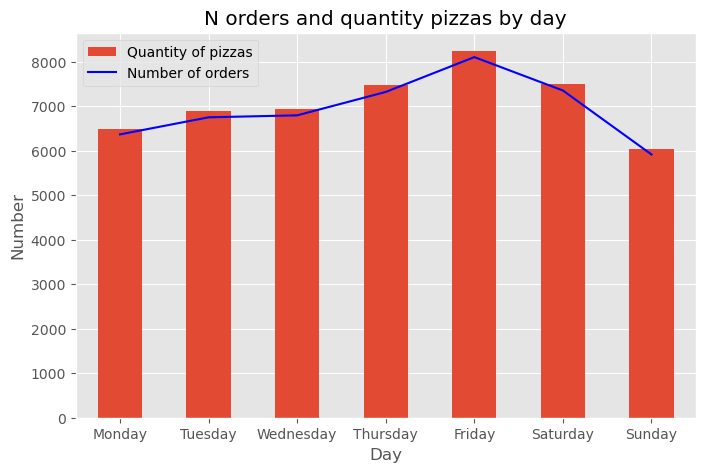

In [41]:
ax = df_order_quantity.plot(kind='bar', x='day', y='quantity',label='Quantity of pizzas')
df_order_quantity.plot(kind='line',x='day',y='order',label='Number of orders',
                       ax=ax,color='blue',xlabel='Day', ylabel='Number',figsize=(8,5),title='N orders and quantity pizzas by day')
plt.show()

In [42]:
df_order_quantity_pizza = df.groupby(['order_dayname','pizza_name_id'])['quantity'].agg(['count','sum']).reset_index()

In [43]:
df_order_quantity_pizza

,order_dayname,pizza_name_id,count,sum
0,Friday,bbq_ckn_l,160,163
1,Friday,bbq_ckn_m,147,148
2,Friday,bbq_ckn_s,89,89
3,Friday,big_meat_s,289,306
4,Friday,brie_carre_s,70,71
...,...,...,...,...
632,Wednesday,the_greek_xl,87,87
633,Wednesday,the_greek_xxl,2,2
634,Wednesday,veggie_veg_l,65,67
635,Wednesday,veggie_veg_m,86,86


In [44]:
# grouping by pizzaID
df_new = df.groupby(['order_month','order_dayname','pizza_name_id'])[['quantity','total_price']].sum().reset_index()
df_new

,order_month,order_dayname,pizza_name_id,quantity,total_price
0,April,Friday,bbq_ckn_l,11,228.250000
1,April,Friday,bbq_ckn_m,12,201.000000
2,April,Friday,bbq_ckn_s,4,51.000000
3,April,Friday,big_meat_s,18,216.000000
4,April,Friday,brie_carre_s,5,118.249998
...,...,...,...,...,...
7291,September,Wednesday,the_greek_xl,5,127.500000
7292,September,Wednesday,the_greek_xxl,1,35.950001
7293,September,Wednesday,veggie_veg_l,4,81.000000
7294,September,Wednesday,veggie_veg_m,7,112.000000


In [45]:
for size in df['pizza_size'].unique():
    print(df[['order_dayname','pizza_size']][df['pizza_size']==size].value_counts(normalize=True),'\n')


order_dayname  pizza_size
Friday         Medium        0.164316
Saturday       Medium        0.153266
Thursday       Medium        0.150601
Wednesday      Medium        0.140331
Tuesday        Medium        0.135717
Monday         Medium        0.133312
Sunday         Medium        0.122457
Name: proportion, dtype: float64 

order_dayname  pizza_size
Friday         Large         0.170193
Thursday       Large         0.152866
Saturday       Large         0.146281
Tuesday        Large         0.141315
Wednesday      Large         0.138616
Monday         Large         0.131005
Sunday         Large         0.119724
Name: proportion, dtype: float64 

order_dayname  pizza_size
Friday         Regular       0.164674
Saturday       Regular       0.154417
Thursday       Regular       0.148405
Wednesday      Regular       0.140129
Tuesday        Regular       0.138785
Monday         Regular       0.128882
Sunday         Regular       0.124708
Name: proportion, dtype: float64 

order_dayname  pizz

In [46]:
top_5_profit = ['thai_ckn_l','five_cheese_l','four_cheese_l','spicy_ital_l','big_meat_s']
df_top5 = df[
    df['pizza_name_id'].isin(top_5_profit)
].reset_index(drop=True).copy()

In [47]:
df_top5 = df_top5.groupby(['pizza_name_id','order_dayname'])[['quantity','total_price']].agg('sum').reset_index()

In [48]:
category = pd.CategoricalDtype(ordered_cats['order_dayname'], ordered=True)
df_top5['order_dayname'] = df_top5['order_dayname'].astype(category)

In [49]:
df_top5.groupby('pizza_name_id')['quantity'].agg('sum')

pizza_name_id
big_meat_s       1914
five_cheese_l    1409
four_cheese_l    1316
spicy_ital_l     1109
thai_ckn_l       1410
Name: quantity, dtype: int64

In [50]:
df_top5.groupby('pizza_name_id')['total_price'].agg('sum')

pizza_name_id
big_meat_s       22968.000000
five_cheese_l    26066.500000
four_cheese_l    23622.201001
spicy_ital_l     23011.750000
thai_ckn_l       29257.500000
Name: total_price, dtype: float64

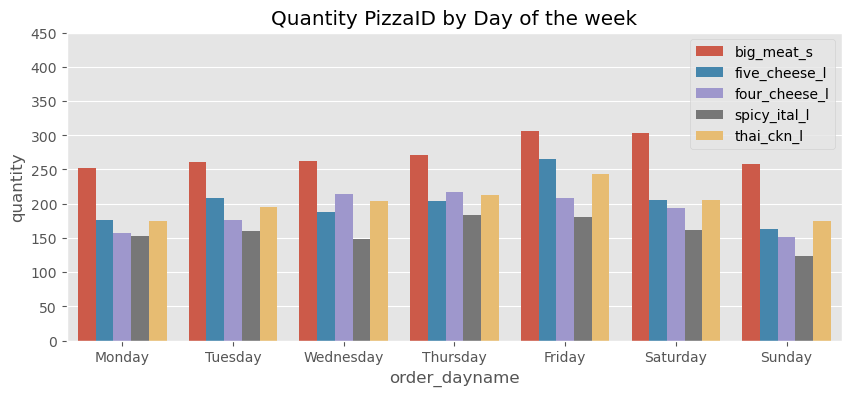

In [51]:
plt.figure(figsize=(10,4))
ax = sns.barplot(data=df_top5,x='order_dayname',y='quantity',hue='pizza_name_id')
ax.set(ylim=(0,450),title='Quantity PizzaID by Day of the week')
ax.legend(loc='upper right')
plt.show()

for pizzaid in df['pizza_name_id'].unique():
    print(df[['order_dayname','pizza_name_id']][df['pizza_name_id']==pizzaid].value_counts(),'\n')

In [52]:
category = pd.CategoricalDtype(ordered_cats['order_dayname'], ordered=True)
df_new['order_dayname'] = df_new['order_dayname'].astype(category)

C:\Users\User\AppData\Local\Temp\ipykernel_1596\2306375930.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


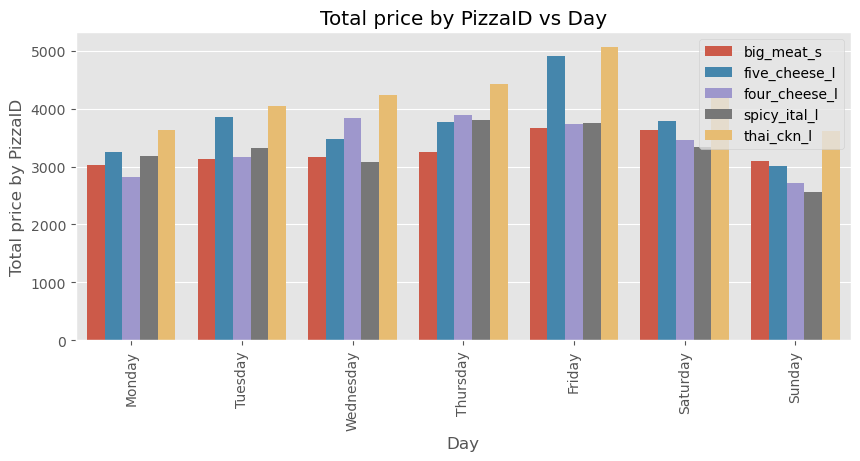

In [53]:
plt.figure(figsize=(10,4))
ax = sns.barplot(data=df_top5,x='order_dayname',y='total_price',hue='pizza_name_id')
ax.set(ylabel='Total price by PizzaID',xlabel='Day',title='Total price by PizzaID vs Day')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.legend(loc='upper right')
plt.show()

In [54]:
df_pizza = df.groupby(['order_dayname','pizza_name','pizza_size'])['total_price'].agg('sum').reset_index()

In [55]:
category = pd.CategoricalDtype(ordered_cats['order_dayname'], ordered=True)
df_pizza['order_dayname'] = df_pizza['order_dayname'].astype(category)

In [56]:
size = ['Regular','Medium','Large']
df_pizza_size = df_pizza[
    df_pizza['pizza_size'].isin(size)
]

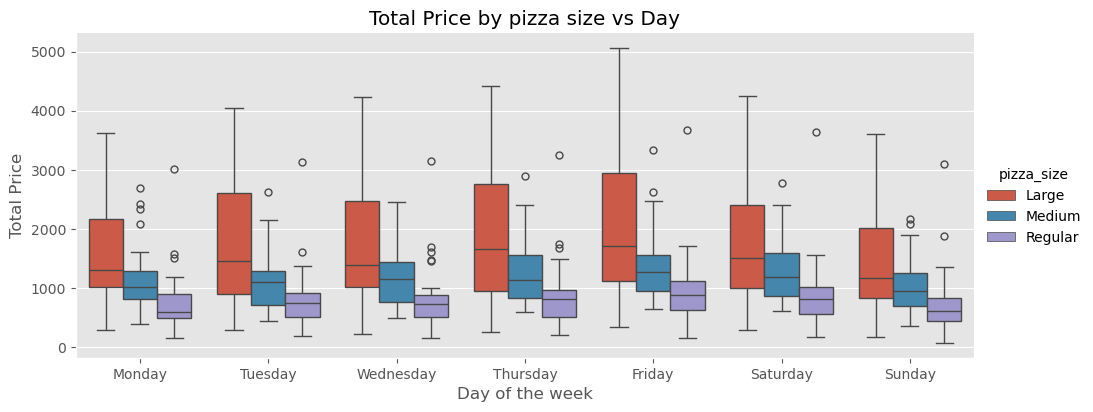

In [57]:
ax = sns.catplot(kind='box',data=df_pizza_size,x='order_dayname',y='total_price', hue='pizza_size',height=4,aspect=2.5)
ax.set(xlabel='Day of the week',ylabel='Total Price',title='Total Price by pizza size vs Day')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_1596\2430022424.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_pizza_trend = df_new[df['pizza_name_id'] == pizzaid]
C:\Users\User\AppData\Local\Temp\ipykernel_1596\2430022424.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_pizza_trend = df_new[df['pizza_name_id'] == pizzaid]
C:\Users\User\AppData\Local\Temp\ipykernel_1596\2430022424.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_pizza_trend = df_new[df['pizza_name_id'] == pizzaid]
C:\Users\User\AppData\Local\Temp\ipykernel_1596\2430022424.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_pizza_trend = df_new[df['pizza_name_id'] == pizzaid]
C:\Users\User\AppData\Local\Temp\ipykernel_1596\2430022424.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_pizza_trend = df_new[df['pizza_name_id'] == pizzaid]


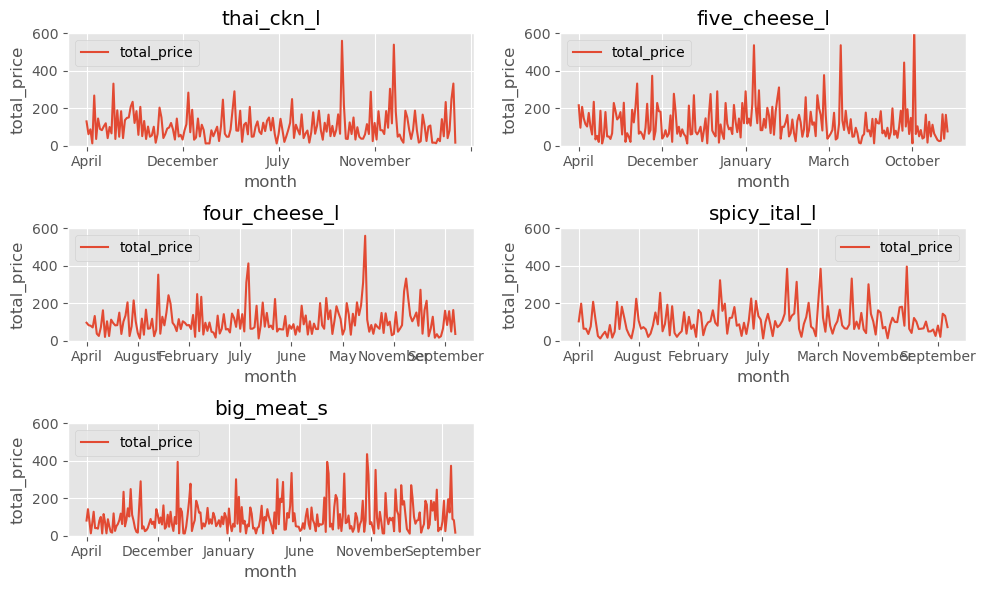

In [58]:
unique_pizza_names = ['thai_ckn_l','five_cheese_l','four_cheese_l','spicy_ital_l','big_meat_s']
num_pizzas = len(unique_pizza_names)
num_cols = 2
num_rows = (num_pizzas + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 2 * num_rows))
axes = axes.flatten()

for i, pizzaid in enumerate(unique_pizza_names):
    ax = axes[i]
    df_pizza_trend = df_new[df['pizza_name_id'] == pizzaid]
    df_pizza_trend.plot(kind='line', x='order_month', y='total_price',figsize=(10,6),ylim=(0,600), xlabel='month', ylabel='total_price', ax=ax, title=pizzaid)

# Remove any empty subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_1596\2561030814.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_pizza_trend = df_new[df['pizza_name_id'] == pizzaid]
C:\Users\User\AppData\Local\Temp\ipykernel_1596\2561030814.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_pizza_trend = df_new[df['pizza_name_id'] == pizzaid]
C:\Users\User\AppData\Local\Temp\ipykernel_1596\2561030814.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_pizza_trend = df_new[df['pizza_name_id'] == pizzaid]
C:\Users\User\AppData\Local\Temp\ipykernel_1596\2561030814.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_pizza_trend = df_new[df['pizza_name_id'] == pizzaid]
C:\Users\User\AppData\Local\Temp\ipykernel_1596\2561030814.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_pizza_trend = df_new[df['pizza_name_id'] == pizzaid]


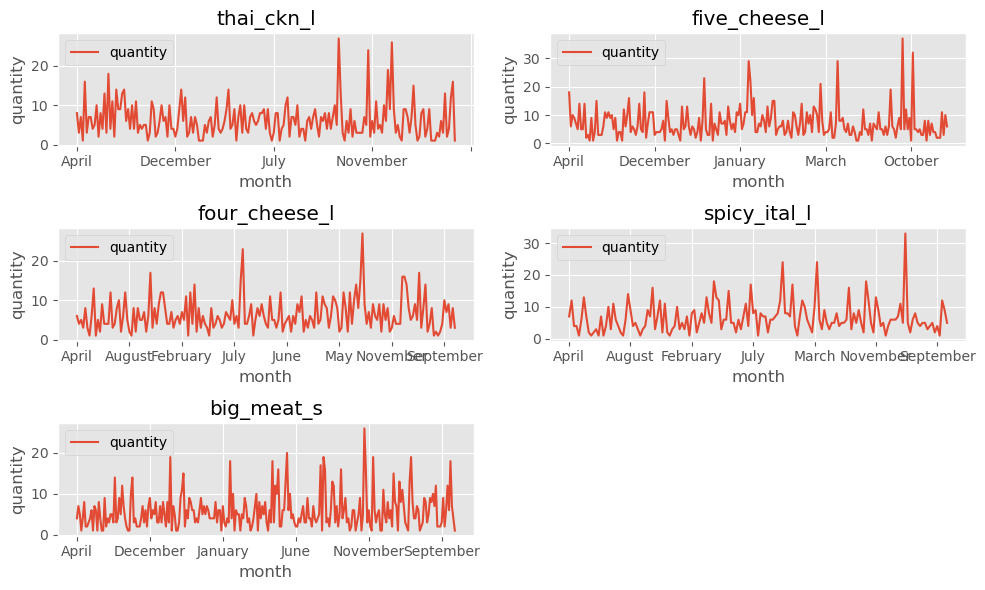

In [59]:
unique_pizza_names = ['thai_ckn_l','five_cheese_l','four_cheese_l','spicy_ital_l','big_meat_s']
num_pizzas = len(unique_pizza_names)
num_cols = 2
num_rows = (num_pizzas + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 2 * num_rows))
axes = axes.flatten()

for i, pizzaid in enumerate(unique_pizza_names):
    ax = axes[i]
    df_pizza_trend = df_new[df['pizza_name_id'] == pizzaid]
    df_pizza_trend.plot(kind='line', x='order_month', y='quantity',figsize=(10,6), xlabel='month', ylabel='quantity', ax=ax, title=pizzaid)

# Remove any empty subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [60]:
tables = 15
seats = 60
seats_per_table = seats/tables
seats_per_table

4.0

df_peak = df[
    (df['order_hour']>11) &
    (df['order_hour']<=18) &
    (df['order_dayname']!='Sunday') &
    (df['order_dayname']!='Saturday')
].reset_index(drop=True)

In [61]:
df_friday = df[
    (df['order_dayname']=='Friday') 
].reset_index(drop=True)

In [62]:
df_friday.groupby(['order_month',
                            'order_day',
                            'order_hour'])['order_minute'].agg('count') # <-- this count how many orders

order_month  order_day  order_hour
April        3          11             6
                        12            18
                        13            27
                        14            12
                        15            11
                                      ..
September    18         18            19
                        19             5
                        20            14
                        21            27
                        22             1
Name: order_minute, Length: 606, dtype: int64

In [63]:
df_order_friday = df_friday.groupby(['order_month',
                            'order_day',
                            'order_hour'])['order_minute'].agg('count').reset_index()
df_order_friday.head()

,order_month,order_day,order_hour,order_minute
0,April,3,11,6
1,April,3,12,18
2,April,3,13,27
3,April,3,14,12
4,April,3,15,11


In [64]:
df_order_friday.rename(columns={'order_minute': 'number_order'}, inplace=True)

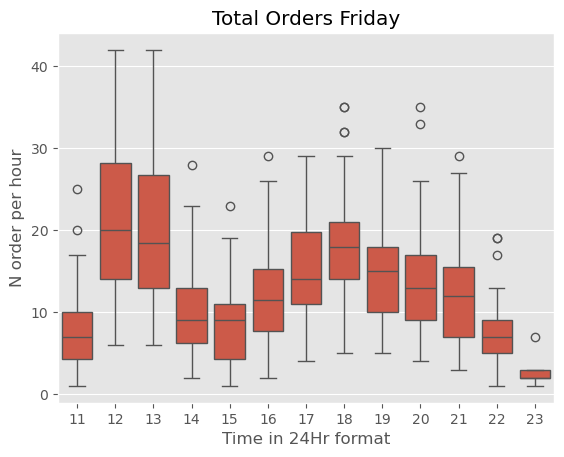

In [65]:
ax = sns.boxplot(data=df_order_friday[['order_hour','number_order']],
            x='order_hour',
            y='number_order')
ax.set(xlabel='Time in 24Hr format',ylabel='N order per hour',title='Total Orders Friday')

plt.show()

In [66]:
df_peak = df[
    (df['order_dayname']!='Sunday') &
    (df['order_dayname']!='Saturday') &
    (df['order_dayname']!='Friday')
].reset_index(drop=True)

In [67]:
df_peak.groupby(['order_month',
                            'order_day',
                            'order_hour'])['order_minute'].agg('count') # <-- this count how many orders

order_month  order_day  order_hour
April        1          11             5
                        12            32
                        13            13
                        14            10
                        15            11
                                      ..
September    30         18             4
                        19            11
                        20            10
                        21             9
                        22             2
Name: order_minute, Length: 2364, dtype: int64

In [68]:
df_order = df_peak.groupby(['order_month',
                            'order_day',
                            'order_hour'])['order_minute'].agg('count').reset_index()
df_order.head()

,order_month,order_day,order_hour,order_minute
0,April,1,11,5
1,April,1,12,32
2,April,1,13,13
3,April,1,14,10
4,April,1,15,11


In [69]:
df_order.rename(columns={'order_minute': 'number_order'}, inplace=True)

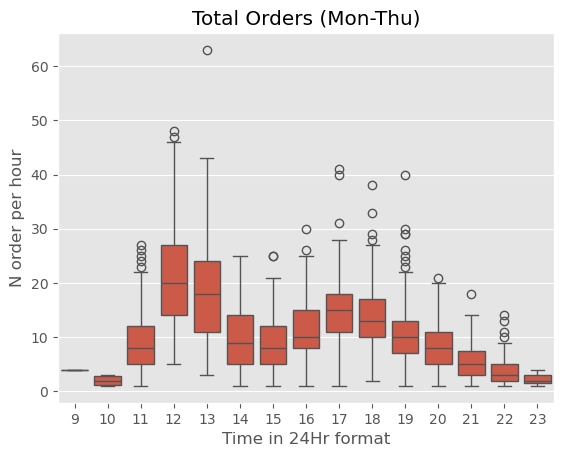

In [70]:
ax = sns.boxplot(data=df_order[['order_hour','number_order']],
            x='order_hour',
            y='number_order')
ax.set(xlabel='Time in 24Hr format',ylabel='N order per hour',title='Total Orders (Mon-Thu)')

plt.show()

In [71]:
df_weekend = df[
    (df['order_dayname']!='Monday') &
    (df['order_dayname']!='Tuesday') &
    (df['order_dayname']!='Wednesday')  &
    (df['order_dayname']!='Thursday')  &
    (df['order_dayname']!='Friday')  
].reset_index(drop=True)

In [72]:
df_weekend.groupby(['order_month',
                            'order_day',
                            'order_hour'])['order_minute'].agg('count')

order_month  order_day  order_hour
April        4          10             3
                        12             8
                        13            18
                        14            27
                        15             7
                                      ..
September    27         18             3
                        19            20
                        20            18
                        21            15
                        22             1
Name: order_minute, Length: 1211, dtype: int64

In [73]:
df_order_weekend = df_weekend.groupby(['order_month',
                            'order_day',
                            'order_hour'])['order_minute'].agg('count').reset_index()
df_order_weekend.head()

,order_month,order_day,order_hour,order_minute
0,April,4,10,3
1,April,4,12,8
2,April,4,13,18
3,April,4,14,27
4,April,4,15,7


In [74]:
df_order_weekend.rename(columns={'order_minute': 'number_order'}, inplace=True)

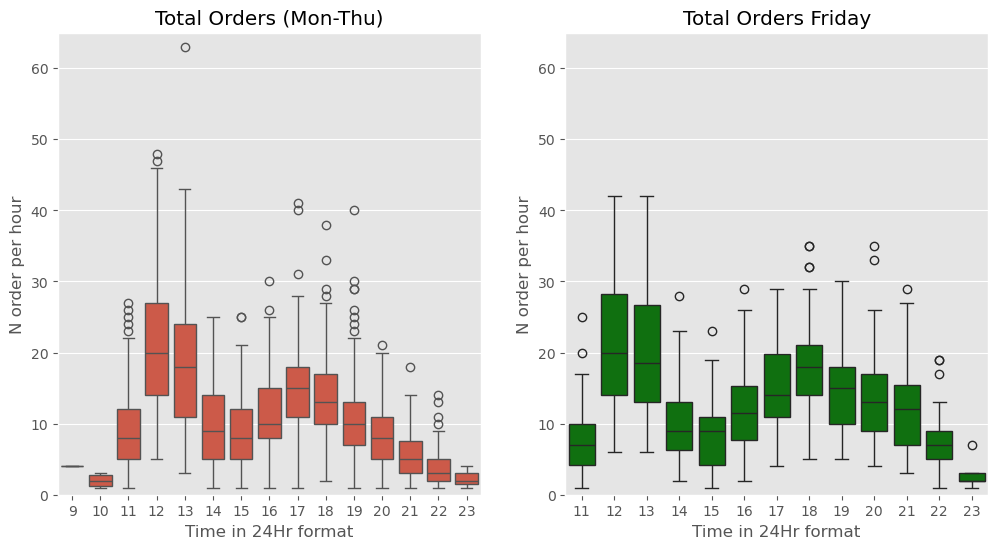

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

ax1 = sns.boxplot(data=df_order[['order_hour','number_order']],
            ax=axes[0],
            x='order_hour',
            y='number_order')
ax1.set(xlabel='Time in 24Hr format',
        ylabel='N order per hour',
        ylim=(0,65),
        title='Total Orders (Mon-Thu)')

#ax2 = sns.boxplot(data=df_order_weekend[['order_hour','number_order']],
#            ax=axes[1],
#            x='order_hour',
#            y='number_order')
#ax2.set(xlabel='Time in 24Hr format',
#        ylabel='N order per hour',
#        ylim=(0,65),
#        title='Total Orders (Sat-Sun)')

ax3 = sns.boxplot(data=df_order_friday[['order_hour','number_order']],
            ax=axes[1],
            x='order_hour',
            y='number_order',color='green')
ax3.set(xlabel='Time in 24Hr format',
        ylabel='N order per hour',
        ylim=(0,65),
        title='Total Orders Friday')

plt.show()

We can see the pizza restaurant is usually busy from Mon-Fri between 12pm - 2pm. During this period, the avg order is between 18~20 orders per hour. We can also see there is one particular day where the restaurant received >60 orders in an hour. 

In [76]:
df_day = df.groupby(['order_dayname','order_hour'])['quantity'].sum().reset_index()
df_day.sort_values('quantity',ascending=False).head()

,order_dayname,order_hour,quantity
57,Thursday,12,1149
58,Thursday,13,1131
15,Monday,12,1126
71,Tuesday,12,1105
1,Friday,12,1101


In [77]:
idx = df_day.groupby('order_dayname')['quantity'].idxmax()
idx

order_dayname
Friday        1
Monday       15
Saturday     35
Sunday       49
Thursday     57
Tuesday      71
Wednesday    84
Name: quantity, dtype: int64

In [78]:
# Peak periods
max_byday = df_day.loc[idx]
max_byday.sort_values('quantity', ascending=False)

,order_dayname,order_hour,quantity
57,Thursday,12,1149
15,Monday,12,1126
71,Tuesday,12,1105
1,Friday,12,1101
84,Wednesday,12,1058
35,Saturday,18,881
49,Sunday,18,732


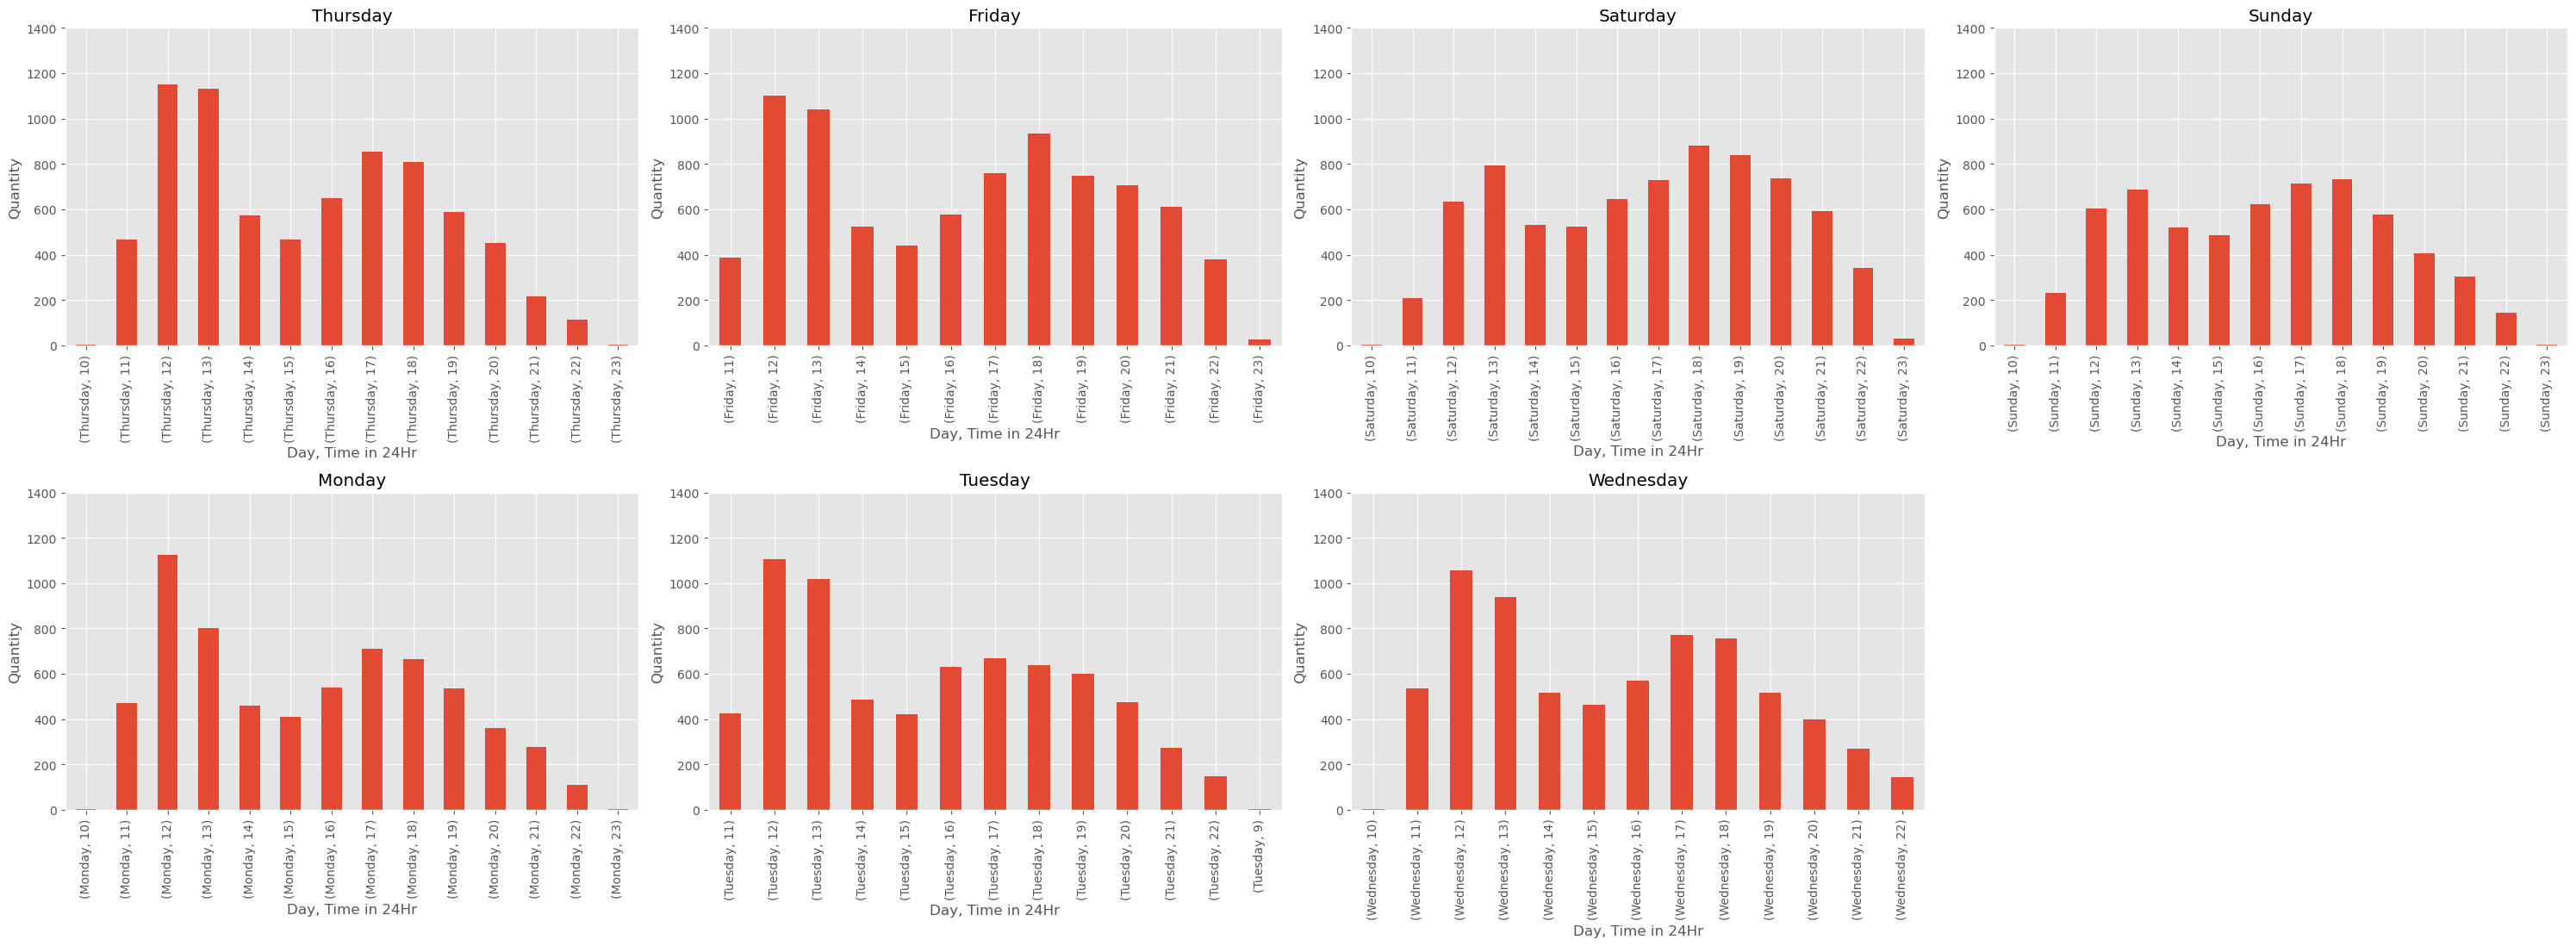

In [115]:
# Initialize the figure and axes
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(30, 15))

# Flatten the axes array for easy iteration
ax = ax.ravel()

# Get unique days
unique_days = df['order_dayname'].unique()

# Iterate through the unique days and create a plot for each
for i, day in enumerate(unique_days):
    day_data = df[df['order_dayname'] == day].groupby(['order_dayname', 'order_hour'])['quantity'].sum()
    day_data.plot(kind='bar', ax=ax[i], title=day)
    ax[i].set_xlabel('Day, Time in 24Hr')
    ax[i].set_ylabel('Quantity')
    ax[i].set_ylim(0, 1400)

# Hide any unused subplots if there are fewer unique days than subplots
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

In [80]:
df_order_friday.groupby('order_hour')['number_order'].agg(['mean','sum','std'])

,mean,sum,std
order_hour,,,
11,7.580000,379,4.949088
12,21.280000,1064,9.363498
13,20.400000,1020,9.247173
14,10.260000,513,5.612704
15,8.640000,432,4.992893
16,11.916667,572,5.530701
17,15.040000,752,6.047297
18,18.520000,926,7.013806
19,15.020408,736,6.213191


In [81]:
df_order.groupby('order_hour')['number_order'].agg(['mean','sum','std'])

,mean,sum,std
order_hour,,,
9,4.000000,4,NaN
10,2.000000,12,0.894427
11,9.305000,1861,5.385816
12,21.058824,4296,9.473659
13,18.450980,3764,9.199622
14,10.025253,1985,6.100210
15,8.618812,1741,4.834396
16,11.553922,2357,5.516838
17,14.620690,2968,6.320559


In [82]:
df_order_weekend.groupby('order_hour')['number_order'].agg(['mean','sum','std'])

,mean,sum,std
order_hour,,,
10,2.500000,5,0.707107
11,5.333333,432,4.655642
12,11.485437,1183,6.600452
13,13.644231,1419,8.181103
14,10.128713,1023,6.331924
15,9.679612,997,5.260309
16,12.076923,1256,5.329333
17,13.682692,1423,6.883587
18,15.543689,1601,6.336599


In [83]:
df_order['number_order'].mean()

11.523688663282572

In [84]:
# most number of order in an hour
df_order[
    df_order['number_order']>60
]

,order_month,order_day,order_hour,number_order
2088,October,15,13,63


In [85]:
df_most_order_hour = df[['pizza_name','quantity','pizza_size','pizza_category','unit_price','total_price']][
    (df['order_month']=='October') &
    (df['order_day']==15) &
    (df['order_hour']==13)
]
df_most_order_hour

,pizza_name,quantity,pizza_size,pizza_category,unit_price,total_price
38447,The Pepper Salami Pizza,1,Medium,Supreme,16.500000,16.500000
38448,The Mediterranean Pizza,1,Large,Veggie,20.250000,20.250000
38449,The Sicilian Pizza,1,Medium,Supreme,16.250000,16.250000
38450,The Spicy Italian Pizza,1,Medium,Supreme,16.500000,16.500000
38451,The Thai Chicken Pizza,1,Large,Chicken,20.750000,20.750000
...,...,...,...,...,...,...
38505,The Mexicana Pizza,1,Medium,Veggie,16.000000,16.000000
38506,The Hawaiian Pizza,1,Regular,Classic,10.500000,10.500000
38507,The Spinach Pesto Pizza,1,Medium,Veggie,16.500000,16.500000
38508,The Four Cheese Pizza,1,Large,Veggie,17.950001,17.950001


In [86]:
df_most_order_hour.groupby('pizza_name')[['quantity','total_price']].agg('sum')

,quantity,total_price
pizza_name,,
The Barbecue Chicken Pizza,2,37.500000
The Calabrese Pizza,2,32.500000
The California Chicken Pizza,2,25.500000
The Chicken Alfredo Pizza,2,29.500000
The Classic Deluxe Pizza,6,97.000000
The Four Cheese Pizza,3,53.850002
The Greek Pizza,2,46.000000
The Hawaiian Pizza,5,55.250000
The Italian Capocollo Pizza,2,28.000000


In [87]:
print('A whopping $',round(df_most_order_hour['total_price'].sum(),2),'profit')

A whopping $ 1050.1 profit


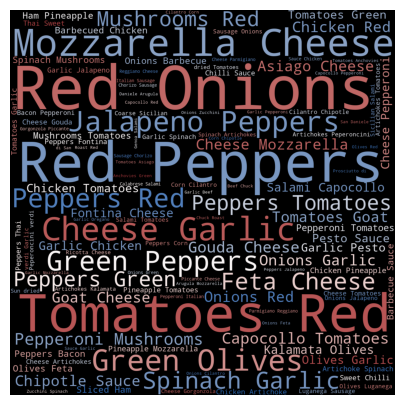

In [88]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df['pizza_ingredients'])

plt.rcParams['figure.figsize'] = (5,5)
wordcloud = WordCloud(background_color = 'black',colormap='vlag', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
plt.show()

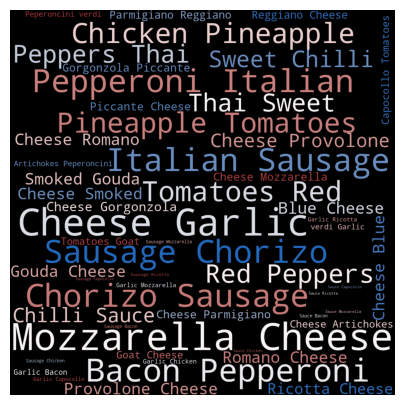

In [89]:
top_5 = ['thai_ckn_l','five_cheese_l','four_cheese_l','spicy_ital_l','big_meat_s']
text = ' '.join(df['pizza_ingredients'][df['pizza_name_id'].isin(top_5)])

plt.rcParams['figure.figsize'] = (5,5)
wordcloud = WordCloud(background_color = 'black',colormap='vlag', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
plt.show()

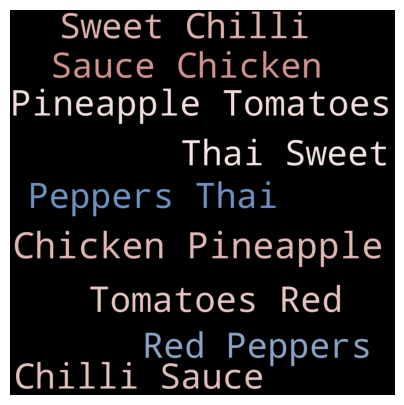

In [90]:
top_1_profit = ['thai_ckn_l']
text = ' '.join(df['pizza_ingredients'][df['pizza_name_id'].isin(top_1_profit)])

plt.rcParams['figure.figsize'] = (5,5)
wordcloud = WordCloud(background_color = 'black',colormap='vlag', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
plt.show()

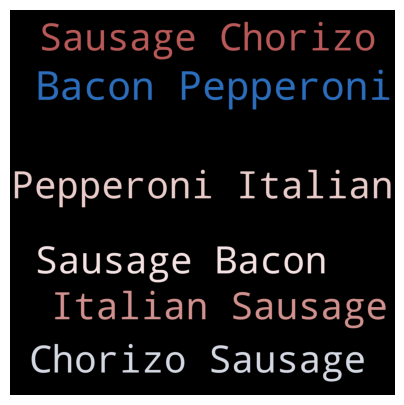

In [91]:
top_1_fav = ['big_meat_s']
text = ' '.join(df['pizza_ingredients'][df['pizza_name_id'].isin(top_1_fav)])

plt.rcParams['figure.figsize'] = (5,5)
wordcloud = WordCloud(background_color = 'black',colormap='vlag', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
plt.show()

<p style="padding:10px;background-color:BLACK;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 15px;overflow:hidden;font-weight:500">EDA SUMMARY<a id='6'></a></p> 

<p style="text-align:justify; ">
    
- 📌 Number 1 favorite pizzaID is big_meat_s 		
- 📌 Least favorite pizzaID is the_greek_xxl	
- 📌 Number 1 profit pizzaID is thai_ckn_l			
- 📌 Least profit pizzaID is the_greek_xxl	
- 📌 Most orders are Large size pizza
- 📌 Classic pizza category is the most prefered
- 📌 Friday is almost always the highest profit
- 📌 Usually highest orders on Friday
- 📌 Normally busy during 12pm - 2pm & 5pm - 8pm. Friday busiest
- 📌 Highest order per hour is 63 orders on 15th October 2015 @ 1pm-2pm 
- 📌 Average 20 orders / hour during peak time
- 📌 Number 1 fav pizza contain sausage bacon, pepperoni italian, italian sausage, bacon pepperoni, chorizo sausage, sausage chorizo
- 📌 Number 1 profit pizza contain chicken pineapple, chilli sauce, tomatoes red, sauce chicken, pineapple tomatoes, sweet chilli, pepper thai, thai sweet, red peppers
</p>

<p style="padding:10px;background-color:BLACK;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 15px;overflow:hidden;font-weight:500">FURTHER INSIGHTS<a id='7'></a></p> 

- 📌 Assuming 1 order per table, can only take 15 orders at once. Since average is 11.5 orders/hour, current seating capacity is sufficient. Do take into consideration peak hours between 12pm - 2pm usually average around 20 orders/hour

-------

<p style="padding:10px;background-color:BLACK;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 15px;overflow:hidden;font-weight:500">DO PEOPLE LIKE PINEAPPLES ON THEIR PIZZA?<a id='7'></a></p> 

# Data Preparation

In [92]:
df['pineapple_lover'] = df['pizza_ingredients'].str.contains('Pineapple', case=False).map({True: 'Yes', False: 'No'})


In [93]:
meat_ingredients = ['Ham', 'Pepperoni', 'Bacon', 'Salami', 'Capocollo', 
                   'Sausage', 'Chicken', 'Pancetta', 'Prosciutto']
pattern = '|'.join(meat_ingredients)
df['meat_lover'] = df['pizza_ingredients'].str.contains(pattern, case=False).map({True: 'Yes', False: 'No'})

In [94]:
cheese_ingredients = ['Ricotta Cheese', 'Gorgonzola Piccante Cheese', 
                      'Mozzarella Cheese', 'Parmigiano Reggiano Cheese']
pattern = '|'.join(cheese_ingredients)
df['cheese_lover'] = df['pizza_ingredients'].str.contains(pattern, case=False).map({True: 'Yes', False: 'No'})

In [95]:
df.head()

,pizza_name_id,order_date_time,pizza_name,quantity,pizza_size,pizza_category,unit_price,total_price,order_dayname,order_day,order_month,order_year,order_hour,order_minute,pizza_ingredients,pineapple_lover,meat_lover,cheese_lover
0,hawaiian_m,2015-01-01 11:38:36,The Hawaiian Pizza,1,Medium,Classic,13.25,13.25,Thursday,1,January,2015,11,38,"Sliced Ham, Pineapple, Mozzarella Cheese",Yes,Yes,Yes
1,classic_dlx_m,2015-01-01 11:57:40,The Classic Deluxe Pizza,1,Medium,Classic,16.00,16.00,Thursday,1,January,2015,11,57,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",No,Yes,No
2,ital_supr_l,2015-01-01 11:57:40,The Italian Supreme Pizza,1,Large,Supreme,20.75,20.75,Thursday,1,January,2015,11,57,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",No,Yes,No
3,five_cheese_l,2015-01-01 11:57:40,The Five Cheese Pizza,1,Large,Veggie,18.50,18.50,Thursday,1,January,2015,11,57,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",No,No,Yes
4,mexicana_m,2015-01-01 11:57:40,The Mexicana Pizza,1,Medium,Veggie,16.00,16.00,Thursday,1,January,2015,11,57,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",No,No,No


In [96]:
df['order_hour'] = df['order_hour'].astype('str')
df['order_minute'] = df['order_minute'].astype('str')
df['order_time'] = df['order_hour'] + ':' + df['order_minute']

df = df[[
    #'order_date_time', 'pizza_name', 
    'quantity', 'pizza_size',
       'pizza_category', 'order_dayname',
       'order_day', 'order_month', 'order_year', 
    'order_hour', 'order_minute', 'unit_price', 'total_price'
]].copy()

df.columns

ordered_cats = {
    'order_dayname':['Monday','Tuesday','Wedneday','Thursday','Friday','Saturday','Sunday'],
    'pizza_size':['Regular','Medium','Large','X-Large','XX-Large']
}
category = pd.CategoricalDtype(ordered_cats['pizza_size'], ordered=True)
df['pizza_size'] = df['pizza_size'].astype(category)
category = pd.CategoricalDtype(ordered_cats['order_dayname'], ordered=True)
df['order_dayname'] = df['order_dayname'].astype(category)

df.head()

Lets change the observation to order by day and summarize total_price to represent profit as our output

df.columns